# Classification

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [3]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [4]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

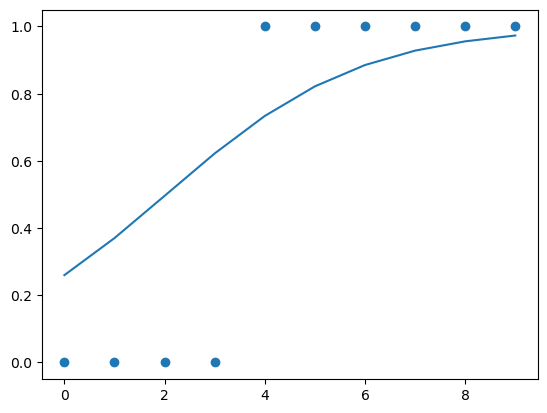

In [6]:
plt.scatter(x,y)
prob = model.predict_proba(x)[:,1]
plt.plot(x,prob)

In [7]:
model.score(x,y)

0.9

In [8]:
cm = confusion_matrix(y, model.predict(x))

<Axes: >

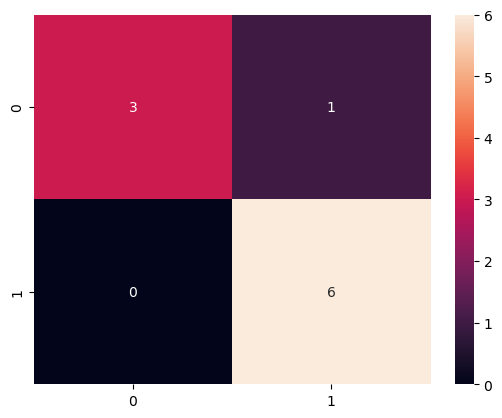

In [9]:
sns.heatmap(cm, annot=True)

In [10]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [11]:
model2 = LogisticRegression(solver='liblinear', random_state=0,C=10.0)

In [12]:
model2.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [13]:
model2.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [14]:
print(classification_report(y,model2.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



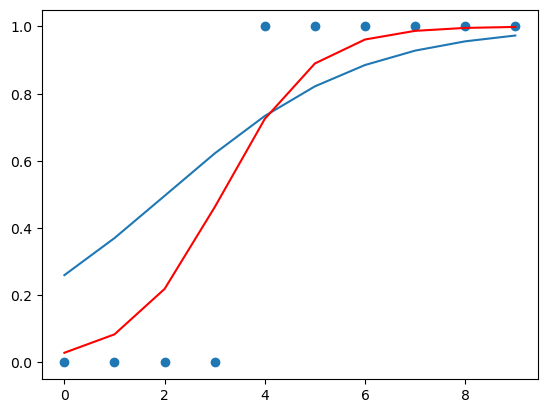

In [15]:
plt.scatter(x,y)
prob = model.predict_proba(x)[:,1]
prob2 = model2.predict_proba(x)[:,1]
plt.plot(x,prob)
plt.plot(x,prob2,color='red')

In [16]:
model2.intercept_

array([-3.51335372])

In [17]:
model2.coef_

array([[1.12066084]])

# Digit Dataset

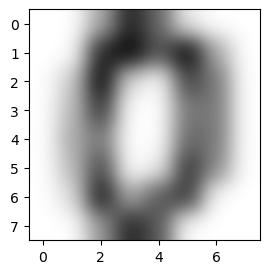

In [3]:
from sklearn import datasets

import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="gaussian")
plt.show()

In [44]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [39]:
X = digits.data
y = digits.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [55]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)


Shape of X:  (1797, 64)
Shape of y:  (1797,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [57]:
print("Shape of X - train: ",X_train.shape)
print("Shape of y - train: ",y_train.shape)
print("Shape of X - test: ",X_test.shape)
print("Shape of y - test: ",y_test.shape)


Shape of X - train:  (1437, 64)
Shape of y - train:  (1437,)
Shape of X - test:  (360, 64)
Shape of y - test:  (360,)


In [61]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [63]:
model = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('logisticmodel', LogisticRegression(solver='liblinear',multi_class='ovr', random_state=0,C=0.05))
    ]
)

In [64]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticmodel',
                 LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                                    solver='liblinear'))])

In [69]:
model.score(X_train,y_train)

0.964509394572025

In [70]:
model.score(X_test,y_test)

0.9416666666666667

In [71]:
confusion_matrix(y_test, model.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

In [72]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



<Axes: >

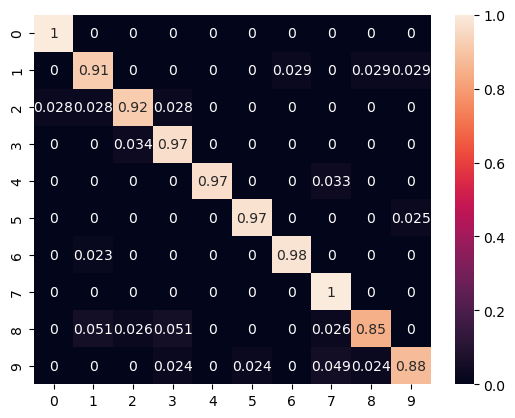

In [75]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test),normalize='true'), annot=True)

# K Nearest Neighbor

In [76]:
weather = ['Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp = ['Hot', 'Hot','Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool','Mild','Mild','Mild','Hot','Mild']

play = ['No', 'No', 'Yes','Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [80]:
le = LabelEncoder()

In [89]:
X = pd.DataFrame({'weather': weather, 'temp':temp})
y = (np.array(play) == 'Yes').astype(int)

In [90]:
X

,weather,temp
0,Sunny,Hot
1,Sunny,Hot
2,Overcast,Hot
3,Rainy,Mild
4,Rainy,Cool
5,Rainy,Cool
6,Overcast,Cool
7,Sunny,Mild
8,Sunny,Cool
9,Rainy,Mild


In [14]:
from sklearn.neighbors import KNeighborsClassifier


le_w = LabelEncoder().fit(weather)
X['weather'] = le_w.transform(weather)
le_t = LabelEncoder().fit(temp)
X['temp'] = le_t.transform(temp)


model = KNeighborsClassifier(n_neighbors=3)

model.fit(X,y)

NameError: name 'weather' is not defined

In [97]:
model.predict([[0,1]])

/Users/yjhouma/opt/anaconda3/envs/hacktiv8/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [6]:
wine_data = datasets.load_wine()

In [7]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [15]:
from sklearn.neighbors import KNeighborsClassifier

X = wine_data.data
y = wine_data.target

In [16]:
pd.DataFrame(X,columns=wine_data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
X_train.shape

(124, 13)

In [19]:
X_test.shape

(54, 13)

In [27]:
model = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)

In [28]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [29]:
y_pred = model.predict(X_test)

In [32]:
model.score(X_test, y_test)

0.9259259259259259

In [30]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.82      0.90        22
           2       0.89      1.00      0.94        16

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.92        54



In [31]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[16,  0,  0],
       [ 2, 18,  2],
       [ 0,  0, 16]])

In [35]:
model = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=7))
    ]
)
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [36]:
model.score(X_test,y_test)

0.9259259259259259

In [41]:
from sklearn.metrics import log_loss

0.28583515107313057

In [50]:
model_performance = []

for k in range(2,40):
    model = Pipeline(
        steps=[
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=k))
        ]
    )
    model.fit(X_train, y_train)
    ll = log_loss(y_test,model.predict_proba(X_test))
    model_performance.append(ll)

In [1]:
plt.figure(figsize=(12,6))
plt.plot(range(2,40), model_performance, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=10)

NameError: name 'plt' is not defined

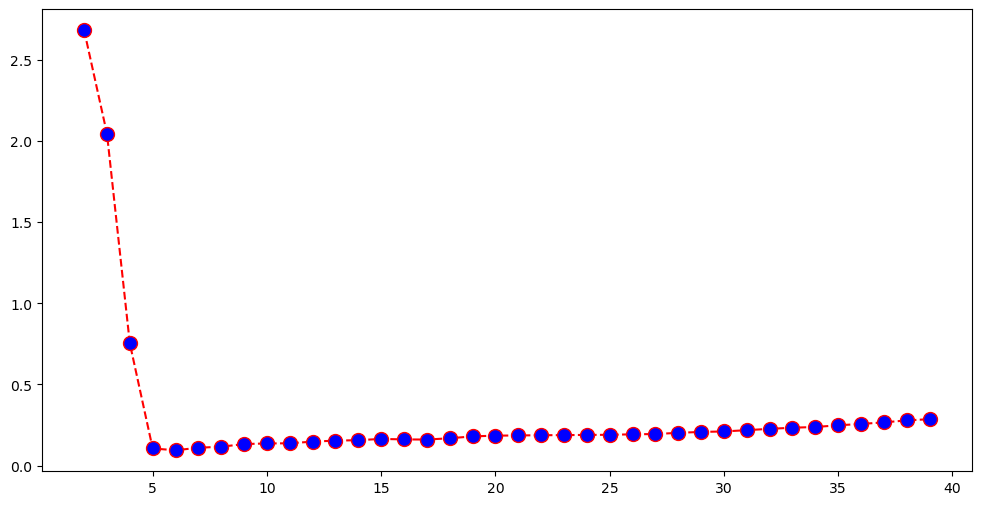

In [51]:
plt.figure(figsize=(12,6))
plt.plot(range(2,40), model_performance, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=10)